In [1]:


import pandas as pd
df = pd.read_csv('clean_tweet_subc.csv')
df.head()



,Unnamed: 0,text,target
0,1,@USER @USER Go home you’re drunk!!! @USER #MAG...,0
1,5,@USER Liberals are all Kookoo !!!,1
2,7,@USER was literally just talking about this lo...,2
3,9,@USER Canada doesn’t need another CUCK! We alr...,0
4,12,@USER you are a lying corrupt traitor!!! Nobod...,0


In [32]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [2]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [3]:
df.head()

,text,target
0,@USER @USER Go home you’re drunk!!! @USER #MAG...,0
1,@USER Liberals are all Kookoo !!!,1
2,@USER was literally just talking about this lo...,2
3,@USER Canada doesn’t need another CUCK! We alr...,0
4,@USER you are a lying corrupt traitor!!! Nobod...,0


In [9]:
'''0 : IND , 1 : OTH , 2 : GRP'''

'0 : IND , 1 : OTH , 2 : GRP'

In [4]:
df = df[pd.notnull(df['text'])]

In [5]:
df.shape

(3876, 2)

In [6]:
df.target

0       0
1       1
2       2
3       0
4       0
5       1
6       0
7       2
8       2
9       0
10      2
11      0
12      2
13      2
14      0
15      1
16      0
17      0
18      0
19      0
20      0
21      0
22      1
23      2
24      0
25      0
26      0
27      0
28      2
29      0
       ..
3846    0
3847    0
3848    0
3849    1
3850    2
3851    0
3852    0
3853    1
3854    0
3855    2
3856    0
3857    0
3858    0
3859    0
3860    0
3861    0
3862    2
3863    0
3864    0
3865    2
3866    0
3867    0
3868    0
3869    0
3870    1
3871    0
3872    2
3873    2
3874    0
3875    1
Name: target, Length: 3876, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3876 entries, 0 to 3875
Data columns (total 2 columns):
text      3876 non-null object
target    3876 non-null int64
dtypes: int64(1), object(1)
memory usage: 90.8+ KB


In [8]:
x = df.text
y = df.target

In [42]:
from sklearn.model_selection import train_test_split
SEED = 50
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(x, y, test_size=.10, random_state=SEED)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.20, random_state=SEED)

In [43]:



print ("Train set has total {0} entries with {1:.2f}% IND, {2:.2f}% OTH, {3:.2f}% GRP".format(
                                                                                                len(x_train),
                                                                             (len(x_train[y_train == 0]) / (len(x_train)*1.))*100,
    
                                                                            (len(x_train[y_train == 1]) / (len(x_train)*1.))*100,
       
                                                                            (len(x_train[y_train == 2]) / (len(x_train)*1.))*100))

print ("Validation set has total {0} entries with {1:.2f}% IND, {2:.2f}% OTH, {3:.2f}% GRP".format(len(x_validation),
                                                                             (len(x_validation[y_validation == 0]) / (len(x_validation)*1.))*100,
                                                                            (len(x_validation[y_validation == 1]) / (len(x_validation)*1.))*100,(len(x_validation[y_validation == 2]) / (len(x_validation)*1.))*100))

print ("Test set has total {0} entries with {1:.2f}% IND, {2:.2f}% OTH, {3:.2f}% GRP".format(len(x_test),
                                                                             (len(x_test[y_test == 0]) / (len(x_test)*1.))*100,
                                                                            (len(x_test[y_test == 1]) / (len(x_test)*1.))*100,(len(x_test[y_test == 2]) / (len(x_test)*1.))*100))


Train set has total 3488 entries with 62.64% IND, 10.12% OTH, 27.24% GRP
Validation set has total 310 entries with 55.16% IND, 10.97% OTH, 33.87% GRP
Test set has total 78 entries with 65.38% IND, 10.26% OTH, 24.36% GRP


In [44]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from time import time


In [49]:
def accuracy_summary(pipeline, x_train, y_train, x_validation, y_validation):
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_validation)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_validation, y_pred)
    print ("accuracy score: {0:.2f}%".format(accuracy*100))
    print ("train and test time: {0:.2f}s".format(train_test_time))
    print ("-"*80)
    return accuracy, train_test_time

In [50]:
cvec = CountVectorizer()
lr = LogisticRegression()
n_features = np.arange(10000,100001,10000)

def nfeature_accuracy_checker(vectorizer=cvec, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=lr):
    result = []
    print (classifier)
    print ("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print ("Validation result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)
        result.append((n,nfeature_accuracy,tt_time))
    return result

In [51]:
%%time
print ("RESULT FOR UNIGRAM WITHOUT STOP WORDS\n")
feature_result_wosw = nfeature_accuracy_checker(stop_words='english')

RESULT FOR UNIGRAM WITHOUT STOP WORDS

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


Validation result for 10000 features


/home/mainak/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/mainak/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


accuracy score: 65.81%
train and test time: 0.27s
--------------------------------------------------------------------------------
Validation result for 20000 features
accuracy score: 65.81%
train and test time: 0.27s
--------------------------------------------------------------------------------
Validation result for 30000 features
accuracy score: 65.81%
train and test time: 0.25s
--------------------------------------------------------------------------------
Validation result for 40000 features
accuracy score: 65.81%
train and test time: 0.25s
--------------------------------------------------------------------------------
Validation result for 50000 features
accuracy score: 65.81%
train and test time: 0.25s
--------------------------------------------------------------------------------
Validation result for 60000 features
accuracy score: 65.81%
train and test time: 0.26s
--------------------------------------------------------------------------------
Validation result for 70000 f

In [52]:
%%time
print ("RESULT FOR UNIGRAM WITH STOP WORDS\n")
feature_result_ug = nfeature_accuracy_checker()

RESULT FOR UNIGRAM WITH STOP WORDS

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


Validation result for 10000 features


/home/mainak/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/mainak/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


accuracy score: 66.77%
train and test time: 0.38s
--------------------------------------------------------------------------------
Validation result for 20000 features
accuracy score: 66.77%
train and test time: 0.35s
--------------------------------------------------------------------------------
Validation result for 30000 features
accuracy score: 66.77%
train and test time: 0.40s
--------------------------------------------------------------------------------
Validation result for 40000 features
accuracy score: 66.77%
train and test time: 0.43s
--------------------------------------------------------------------------------
Validation result for 50000 features
accuracy score: 66.77%
train and test time: 0.35s
--------------------------------------------------------------------------------
Validation result for 60000 features
accuracy score: 66.77%
train and test time: 0.35s
--------------------------------------------------------------------------------
Validation result for 70000 f

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer()
cvec.fit(x)


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [61]:
len(cvec.get_feature_names())

9579

In [62]:
ind_doc_matrix = cvec.transform(df[df.target == 0].text)
oth_doc_matrix = cvec.transform(df[df.target == 1].text)
grp_doc_matrix = cvec.transform(df[df.target == 2].text)

ind_tf = np.sum(ind_doc_matrix,axis=0)
oth_tf = np.sum(oth_doc_matrix,axis=0)
grp_tf = np.sum(grp_doc_matrix,axis=0)

ind = np.squeeze(np.asarray(ind_tf))
oth = np.squeeze(np.asarray(oth_tf))
grp = np.squeeze(np.asarray(grp_tf))

term_freq_df = pd.DataFrame([ind,oth,grp],columns=cvec.get_feature_names()).transpose()


In [63]:
term_freq_df.columns = ['ind', 'oth', 'grp']
term_freq_df['total'] = term_freq_df['ind'] + term_freq_df['oth'] + term_freq_df['grp']
term_freq_df.sort_values(by='total', ascending=False).iloc[:10]


,ind,oth,grp,total
user,4590,829,2514,7933
the,1556,364,1070,2990
is,1497,184,476,2157
to,1188,203,684,2075
and,957,184,593,1734
you,1208,149,369,1726
of,657,160,448,1265
are,607,110,446,1163
he,880,55,145,1080
that,601,115,341,1057


In [64]:

from sklearn.feature_extraction import text

a = frozenset(list(term_freq_df.sort_values(by='total', ascending=False).iloc[:10].index))
b = text.ENGLISH_STOP_WORDS
set(a).issubset(set(b))

False

In [66]:
my_stop_words = frozenset(list(term_freq_df.sort_values(by='total', ascending=False).iloc[:10].index))

In [67]:
%%time
print ("RESULT FOR UNIGRAM WITHOUT CUSTOM STOP WORDS (Top 10 frequent words)\n")
feature_result_wocsw = nfeature_accuracy_checker(stop_words=my_stop_words)


RESULT FOR UNIGRAM WITHOUT CUSTOM STOP WORDS (Top 10 frequent words)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


Validation result for 10000 features


/home/mainak/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/mainak/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


accuracy score: 65.48%
train and test time: 0.30s
--------------------------------------------------------------------------------
Validation result for 20000 features
accuracy score: 65.48%
train and test time: 0.30s
--------------------------------------------------------------------------------
Validation result for 30000 features
accuracy score: 65.48%
train and test time: 0.28s
--------------------------------------------------------------------------------
Validation result for 40000 features
accuracy score: 65.48%
train and test time: 0.28s
--------------------------------------------------------------------------------
Validation result for 50000 features
accuracy score: 65.48%
train and test time: 0.32s
--------------------------------------------------------------------------------
Validation result for 60000 features
accuracy score: 65.48%
train and test time: 0.38s
--------------------------------------------------------------------------------
Validation result for 70000 f

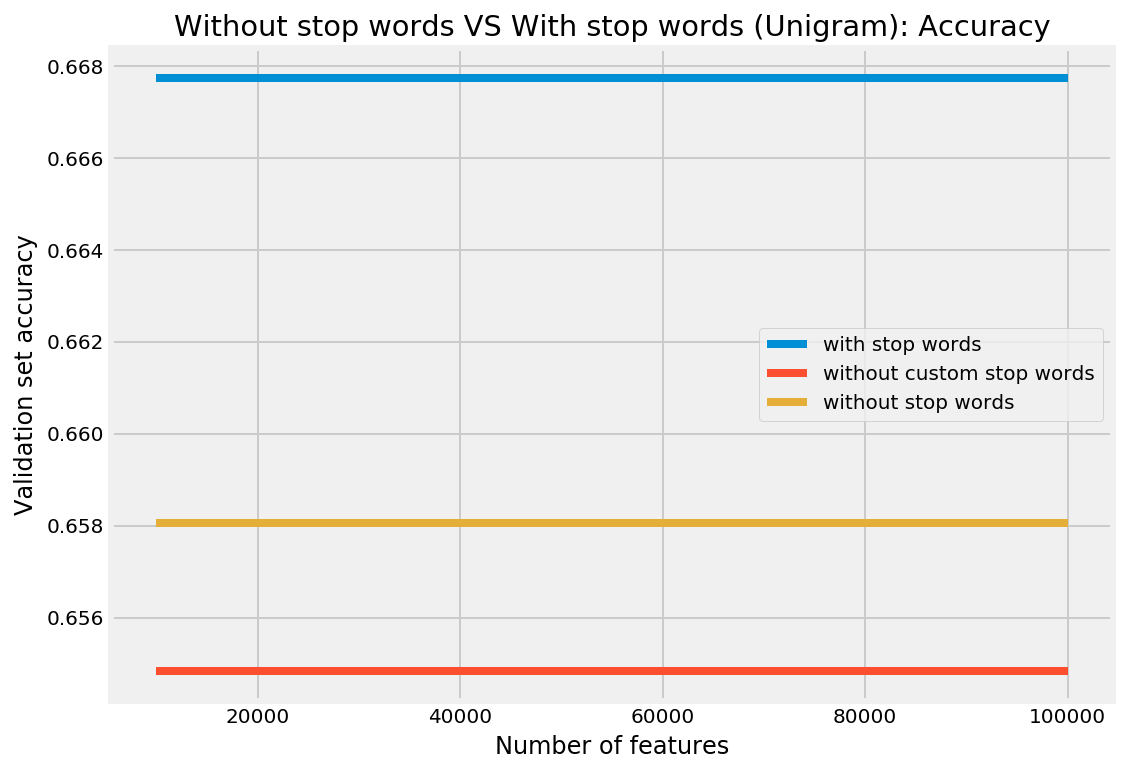

In [68]:
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug_wocsw = pd.DataFrame(feature_result_wocsw,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug_wosw = pd.DataFrame(feature_result_wosw,columns=['nfeatures','validation_accuracy','train_test_time'])

plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='with stop words')
plt.plot(nfeatures_plot_ug_wocsw.nfeatures, nfeatures_plot_ug_wocsw.validation_accuracy,label='without custom stop words')
plt.plot(nfeatures_plot_ug_wosw.nfeatures, nfeatures_plot_ug_wosw.validation_accuracy,label='without stop words')
plt.title("Without stop words VS With stop words (Unigram): Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

In [69]:
%%time
print ("RESULT FOR BIGRAM WITH STOP WORDS\n")
feature_result_bg = nfeature_accuracy_checker(ngram_range=(1, 2))

RESULT FOR BIGRAM WITH STOP WORDS

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


Validation result for 10000 features


/home/mainak/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/mainak/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


accuracy score: 63.23%
train and test time: 0.66s
--------------------------------------------------------------------------------
Validation result for 20000 features
accuracy score: 63.23%
train and test time: 0.76s
--------------------------------------------------------------------------------
Validation result for 30000 features
accuracy score: 63.55%
train and test time: 0.97s
--------------------------------------------------------------------------------
Validation result for 40000 features
accuracy score: 65.16%
train and test time: 0.97s
--------------------------------------------------------------------------------
Validation result for 50000 features
accuracy score: 65.16%
train and test time: 1.15s
--------------------------------------------------------------------------------
Validation result for 60000 features
accuracy score: 65.16%
train and test time: 1.20s
--------------------------------------------------------------------------------
Validation result for 70000 f

In [70]:
%%time
print ("RESULT FOR TRIGRAM WITH STOP WORDS\n")
feature_result_tg = nfeature_accuracy_checker(ngram_range=(1, 3))


RESULT FOR TRIGRAM WITH STOP WORDS

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


Validation result for 10000 features


/home/mainak/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/mainak/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


accuracy score: 64.52%
train and test time: 1.01s
--------------------------------------------------------------------------------
Validation result for 20000 features
accuracy score: 63.87%
train and test time: 1.16s
--------------------------------------------------------------------------------
Validation result for 30000 features
accuracy score: 64.19%
train and test time: 1.13s
--------------------------------------------------------------------------------
Validation result for 40000 features
accuracy score: 64.52%
train and test time: 1.21s
--------------------------------------------------------------------------------
Validation result for 50000 features
accuracy score: 64.84%
train and test time: 1.30s
--------------------------------------------------------------------------------
Validation result for 60000 features
accuracy score: 65.16%
train and test time: 1.44s
--------------------------------------------------------------------------------
Validation result for 70000 f

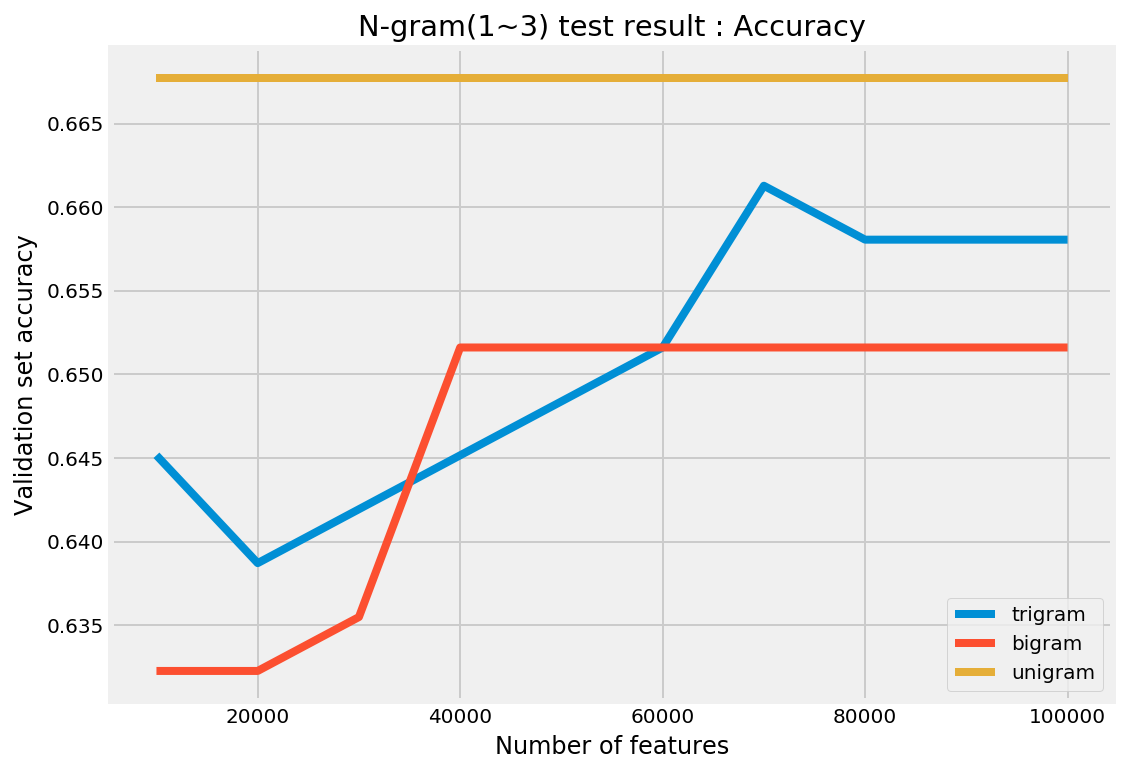

In [71]:
nfeatures_plot_tg = pd.DataFrame(feature_result_tg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bg = pd.DataFrame(feature_result_bg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy','train_test_time'])

plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram')
plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer()

In [73]:
%%time
print ("RESULT FOR UNIGRAM WITH STOP WORDS (Tfidf)\n")
feature_result_ugt = nfeature_accuracy_checker(vectorizer=tvec)


RESULT FOR UNIGRAM WITH STOP WORDS (Tfidf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


Validation result for 10000 features
accuracy score: 65.48%
train and test time: 0.19s
--------------------------------------------------------------------------------
Validation result for 20000 features


/home/mainak/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/mainak/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


accuracy score: 65.48%
train and test time: 0.21s
--------------------------------------------------------------------------------
Validation result for 30000 features
accuracy score: 65.48%
train and test time: 0.17s
--------------------------------------------------------------------------------
Validation result for 40000 features
accuracy score: 65.48%
train and test time: 0.19s
--------------------------------------------------------------------------------
Validation result for 50000 features
accuracy score: 65.48%
train and test time: 0.18s
--------------------------------------------------------------------------------
Validation result for 60000 features
accuracy score: 65.48%
train and test time: 0.27s
--------------------------------------------------------------------------------
Validation result for 70000 features
accuracy score: 65.48%
train and test time: 0.24s
--------------------------------------------------------------------------------
Validation result for 80000 f

In [74]:
%%time
print ("RESULT FOR BIGRAM WITH STOP WORDS (Tfidf)\n")
feature_result_bgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 2))

RESULT FOR BIGRAM WITH STOP WORDS (Tfidf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


Validation result for 10000 features


/home/mainak/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/mainak/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


accuracy score: 65.16%
train and test time: 0.47s
--------------------------------------------------------------------------------
Validation result for 20000 features
accuracy score: 63.87%
train and test time: 0.47s
--------------------------------------------------------------------------------
Validation result for 30000 features
accuracy score: 64.19%
train and test time: 0.60s
--------------------------------------------------------------------------------
Validation result for 40000 features
accuracy score: 64.19%
train and test time: 0.55s
--------------------------------------------------------------------------------
Validation result for 50000 features
accuracy score: 64.19%
train and test time: 0.68s
--------------------------------------------------------------------------------
Validation result for 60000 features
accuracy score: 63.55%
train and test time: 0.60s
--------------------------------------------------------------------------------
Validation result for 70000 f

In [75]:
%%time
print ("RESULT FOR TRIGRAM WITH STOP WORDS (Tfidf)\n")
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 3))


RESULT FOR TRIGRAM WITH STOP WORDS (Tfidf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


Validation result for 10000 features


/home/mainak/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/mainak/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


accuracy score: 64.19%
train and test time: 0.77s
--------------------------------------------------------------------------------
Validation result for 20000 features
accuracy score: 64.52%
train and test time: 0.91s
--------------------------------------------------------------------------------
Validation result for 30000 features
accuracy score: 64.52%
train and test time: 0.84s
--------------------------------------------------------------------------------
Validation result for 40000 features
accuracy score: 64.19%
train and test time: 0.92s
--------------------------------------------------------------------------------
Validation result for 50000 features
accuracy score: 63.87%
train and test time: 1.06s
--------------------------------------------------------------------------------
Validation result for 60000 features
accuracy score: 63.87%
train and test time: 1.08s
--------------------------------------------------------------------------------
Validation result for 70000 f

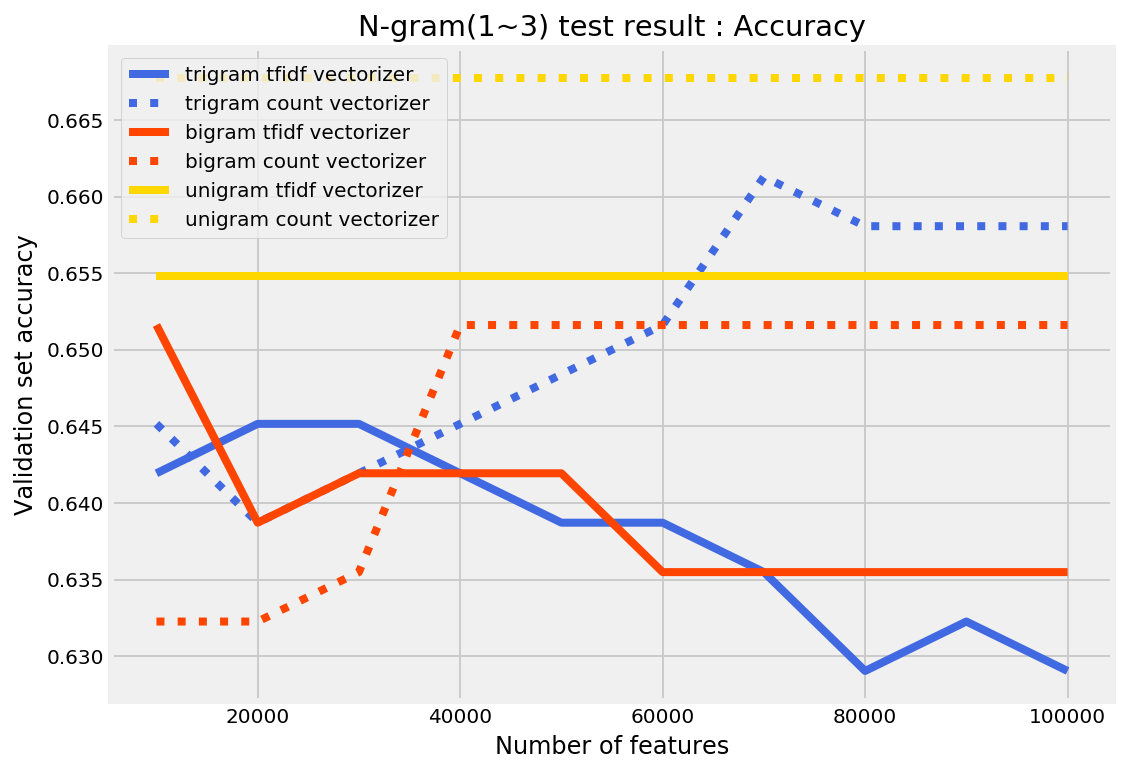

In [76]:
nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bgt = pd.DataFrame(feature_result_bgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ugt = pd.DataFrame(feature_result_ugt,columns=['nfeatures','validation_accuracy','train_test_time'])

plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram count vectorizer',linestyle=':', color='royalblue')
plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram count vectorizer',linestyle=':',color='orangered')
plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.validation_accuracy, label='unigram tfidf vectorizer',color='gold')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram count vectorizer',linestyle=':',color='gold')
plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

In [80]:
'''best result : unigram cvec at any feature'''

'best result : unigram cvec at any feature'

In [94]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import NearestCentroid
from sklearn.feature_selection import SelectFromModel

names = ["Logistic Regression", "Linear SVC", "LinearSVC with L1-based feature selection","Multinomial NB", 
         "Bernoulli NB", "Ridge Classifier", "AdaBoost", "Perceptron","Passive-Aggresive", "Nearest Centroid"]
classifiers = [
    LogisticRegression(),
    LinearSVC(),
    Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False))),
  ('classification', LinearSVC(penalty="l2"))]),
    MultinomialNB(),
    BernoulliNB(),
    RidgeClassifier(),
    AdaBoostClassifier(),
    Perceptron(),
    PassiveAggressiveClassifier(),
    NearestCentroid()
    ]
zipped_clf = zip(names,classifiers)

In [95]:
cvec = CountVectorizer()
def classifier_comparator(vectorizer=cvec, n_features=10000, stop_words=None, ngram_range=(1, 1), classifier=zipped_clf):
    result = []
    vectorizer.set_params(stop_words=stop_words, max_features=n_features, ngram_range=ngram_range)
    for n,c in classifier:
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', c)
        ])
        print ("Validation result for {}".format(n))
        print (c)
        clf_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)
        result.append((n,clf_accuracy,tt_time))
    return result


In [96]:
%%time
unigram_result = classifier_comparator(n_features=100000,ngram_range=(1,1))

Validation result for Logistic Regression
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


/home/mainak/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/mainak/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


accuracy score: 66.77%
train and test time: 0.36s
--------------------------------------------------------------------------------
Validation result for Linear SVC
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)


/home/mainak/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


accuracy score: 60.00%
train and test time: 1.14s
--------------------------------------------------------------------------------
Validation result for LinearSVC with L1-based feature selection
Pipeline(memory=None,
     steps=[('feature_selection', SelectFromModel(estimator=LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=0),
        max_features=None, n...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])
accuracy score: 61.61%
train and test time: 2.11s
--------------------------------------------------------------------------------
Validation result for Multinomial NB
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
accuracy score: 66.13%
train and test time: 0.13s
--------------------------------------------------------------------------------
Validation resu

/home/mainak/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/mainak/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


accuracy score: 61.94%
train and test time: 0.14s
--------------------------------------------------------------------------------
Validation result for Nearest Centroid
NearestCentroid(metric='euclidean', shrink_threshold=None)
accuracy score: 53.55%
train and test time: 0.13s
--------------------------------------------------------------------------------
CPU times: user 6.78 s, sys: 23 ms, total: 6.81 s
Wall time: 6.79 s


In [97]:
''' Best result : Logistics Regression (66.77%) - unigram - cvec - 1,00,000 feature'''

' Best result : Logistics Regression (66.77%) - unigram - cvec - 1,00,000 feature'

In [98]:
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression()
clf2 = LinearSVC()
clf3 = MultinomialNB()
clf4 = RidgeClassifier()
clf5 = PassiveAggressiveClassifier()
clf6 = AdaBoostClassifier()

eclf = VotingClassifier(estimators=[('lr', clf1), ('svc', clf2), ('mnb', clf3), ('rcs', clf4), ('pac', clf5), ('ada', clf5)], voting='hard')

for clf, label in zip([clf1, clf2, clf3, clf4, clf5, clf6,eclf], ['Logistic Regression', 'Linear SVC', 'Multinomial NB', 'Ridge Classifier', 'Passive Aggresive Classifier', 'AdaBoostClassifier','Ensemble']):
    checker_pipeline = Pipeline([
            ('vectorizer', CountVectorizer(max_features=100000,ngram_range=(1, 1))),
            ('classifier', clf)
        ])
    print ("Validation result for {}".format(label))
    print (clf)
    clf_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)

Validation result for Logistic Regression
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


/home/mainak/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/mainak/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


accuracy score: 66.77%
train and test time: 0.36s
--------------------------------------------------------------------------------
Validation result for Linear SVC
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)


/home/mainak/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


accuracy score: 60.00%
train and test time: 1.02s
--------------------------------------------------------------------------------
Validation result for Multinomial NB
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
accuracy score: 66.13%
train and test time: 0.14s
--------------------------------------------------------------------------------
Validation result for Ridge Classifier
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='auto',
        tol=0.001)
accuracy score: 65.16%
train and test time: 2.27s
--------------------------------------------------------------------------------
Validation result for Passive Aggresive Classifier
PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
              early_stopping=False, fit_intercept=True, loss='hinge',
              max_iter=None, n_iter=None, n_iter_no_change=5, n_jobs=None,
              random_state=None, sh

/home/mainak/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


accuracy score: 63.87%
train and test time: 0.55s
--------------------------------------------------------------------------------
Validation result for Ensemble
VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('svc', LinearS...=None, shuffle=True, tol=None,
              validation_fraction=0.1, verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)


/home/mainak/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/mainak/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/mainak/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


accuracy score: 64.19%
train and test time: 3.51s
--------------------------------------------------------------------------------


/home/mainak/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [99]:
'''same as previous'''

'same as previous'

In [100]:
'''Best result : Logistics Regression (66.77%) - unigram - cvec - 1,00,000 feature'''

'Best result : Logistics Regression (66.77%) - unigram - cvec - 1,00,000 feature'